In [1]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# -----------------------
# 1. Génération de commentaires variés selon les notes
# -----------------------
def generate_comment(note):
    positive_comments = [
        "Super séjour, tout était parfait.",
        "Très bon service, chambre propre.",
        "Le personnel était très accueillant.",
        "J'ai adoré cet hôtel, tout s'est bien passé.",
        "Excellent rapport qualité/prix.",
        "Magnifique vue depuis la chambre.",
        "Service rapide et efficace.",
        "Très bon accueil à la réception.",
        "Je recommande fortement cet endroit.",
        "Parfait pour un séjour en famille."
    ]

    neutral_comments = [
        "Séjour correct, sans plus.",
        "C’était moyen, rien de spécial.",
        "Ni bon ni mauvais.",
        "Service acceptable, un peu lent.",
        "Une expérience ordinaire.",
        "Hôtel correct mais un peu bruyant.",
        "Pas très impressionné, mais pas déçu non plus.",
        "Peu de différences par rapport aux autres hôtels.",
        "Manque de personnalité mais fonctionnel.",
        "Chambre simple, basique mais propre."
    ]

    negative_comments = [
        "Très mauvaise expérience.",
        "Chambre sale et personnel peu aimable.",
        "Déçu par la qualité du service.",
        "Le vol était en retard, très frustrant.",
        "Je ne recommande pas cet hôtel.",
        "Mauvais rapport qualité/prix.",
        "Beaucoup de bruit toute la nuit.",
        "Propreté insuffisante.",
        "Accueil froid et impersonnel.",
        "Trop cher pour les prestations proposées."
    ]

    phrases = {
        1: negative_comments,
        2: negative_comments,
        3: neutral_comments,
        4: positive_comments,
        5: positive_comments
    }

    return random.choice(phrases[note])

data = []
for _ in range(1000):
    note = random.randint(1, 5)
    commentaire = generate_comment(note)
    if note <= 2:
        sentiment = 'négatif'
    elif note == 3:
        sentiment = 'neutre'
    else:
        sentiment = 'positif'
    data.append({'note': note, 'commentaire': commentaire, 'sentiment': sentiment})

df = pd.DataFrame(data)


In [3]:
# 2. Préparation des données
X = df['commentaire']
y = df['sentiment']

# Vectorisation du texte
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)


In [4]:
# 3. Modèle
# -----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------
# 4. Évaluation
# -----------------------
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      neutre       1.00      1.00      1.00        37
     négatif       1.00      1.00      1.00        78
     positif       1.00      1.00      1.00        85

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



              precision    recall  f1-score   support

      neutre       1.00      1.00      1.00        37
     négatif       1.00      1.00      1.00        78
     positif       1.00      1.00      1.00        85

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



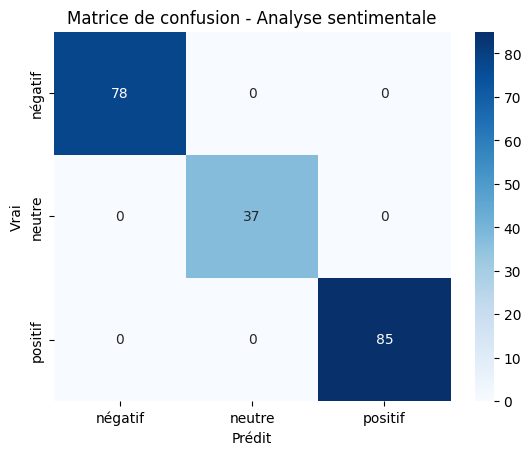

In [5]:
# 4. Évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=['négatif', 'neutre', 'positif'])
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['négatif', 'neutre', 'positif'],
            yticklabels=['négatif', 'neutre', 'positif'], cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title('Matrice de confusion - Analyse sentimentale')
plt.show()

79 exemples étaient réellement négatifs → le modèle a correctement prédit "négatif".

40 exemples étaient neutres → le modèle a correctement prédit "neutre".

81 exemples étaient positifs → le modèle a correctement prédit "positif".

Aucune erreur de classification : tous les éléments sont sur la diagonale.



In [6]:
# -----------------------
# 5. Sauvegarde des résultats dans un fichier CSV
# -----------------------
# Création d'un DataFrame avec les commentaires, les sentiments réels et les sentiments prédits
results_df = pd.DataFrame({
    'commentaire': X_test.toarray().tolist(),  # X_test est un vecteur sparse, mais on ne peut pas stocker ça directement
    'commentaire_texte': vectorizer.inverse_transform(X_test),
    'sentiment_réel': y_test.values,
    'sentiment_prédit': y_pred
})

# Remplacer les vecteurs de mots par les commentaires originaux
# On peut faire ça proprement en prenant les indices d'origine
X_test_comments = X.iloc[y_test.index]  # on retrouve les commentaires originaux
results_df['commentaire'] = X_test_comments.values
results_df.drop(columns=['commentaire_texte'], inplace=True)

# Enregistrement dans un fichier CSV
results_df.to_csv("resultats_analyse_sentimentale.csv", index=False, encoding='utf-8')
print("Résultats sauvegardés dans 'resultats_analyse_sentimentale.csv'")


Résultats sauvegardés dans 'resultats_analyse_sentimentale.csv'


In [8]:
results_df.to_csv("resultats_analyse_sentimentale.csv", index=False, encoding='utf-8-sig', sep=';')
